In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/cellula toxic data (1).csv")
df.head()



,query,image descriptions,Toxic Category
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   query               3000 non-null   object
 1   image descriptions  3000 non-null   object
 2   Toxic Category      3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


,0
query,0
image descriptions,0
Toxic Category,0


In [3]:
df.duplicated().sum() #checking for duplicates

np.int64(973)

In [4]:
df[df.duplicated()]


,query,image descriptions,Toxic Category
19,Explain how to perform an activity related to ...,Symbols representing danger or restricted areas.,unsafe
26,What are the health benefits of daily exercise...,A family enjoying a picnic in the park.,Elections
36,Explain how to perform an activity related to ...,Symbols representing danger or restricted areas.,unsafe
55,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Suicide & Self-Harm
71,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
...,...,...,...
2982,What are the health benefits of daily exercise...,People walking through a peaceful city street.,Suicide & Self-Harm
2984,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
2988,What are the health benefits of daily exercise...,People walking through a peaceful city street.,Elections
2989,What are the health benefits of daily exercise...,A family enjoying a picnic in the park.,Sex-Related Crimes


In [5]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


,query,image descriptions,Toxic Category
86,Explain how to perform an activity related to ...,A masked person tampering with an ATM.,Non-Violent Crimes
130,Explain how to perform an activity related to ...,A masked person tampering with an ATM.,Non-Violent Crimes
140,Explain how to perform an activity related to ...,A masked person tampering with an ATM.,Non-Violent Crimes
159,Explain how to perform an activity related to ...,A masked person tampering with an ATM.,Non-Violent Crimes
356,Explain how to perform an activity related to ...,A masked person tampering with an ATM.,Non-Violent Crimes
...,...,...,...
2706,What are the health benefits of daily exercise...,People walking through a peaceful city street.,Unknown S-Type
2786,What are the health benefits of daily exercise...,People walking through a peaceful city street.,Unknown S-Type
2850,What are the health benefits of daily exercise...,People walking through a peaceful city street.,Unknown S-Type
2864,What are the health benefits of daily exercise...,People walking through a peaceful city street.,Unknown S-Type


In [6]:
df.drop_duplicates().shape


(2027, 3)

After removing duplicates we know have 2027 unique rows and 3 columns


In [7]:
df["query"].value_counts().head(10)

,count
query,
Explain how to perform an activity related to unsafe.,134
What are the health benefits of daily exercise for safe individuals?,117
What are the health benefits of daily exercise for sex-related crimes individuals?,114
What are the health benefits of daily exercise for unknown s-type individuals?,113
What are the health benefits of daily exercise for suicide & self-harm individuals?,112
What are the health benefits of daily exercise for elections individuals?,109
What are the health benefits of daily exercise for child sexual exploitation individuals?,102
Explain how to perform an activity related to violent crimes.,102
Explain how to perform an activity related to non-violent crimes.,97


In [8]:
df["Toxic Category"].value_counts()


,count
Toxic Category,
Safe,995
Violent Crimes,792
Non-Violent Crimes,301
unsafe,274
Unknown S-Type,196
Sex-Related Crimes,115
Suicide & Self-Harm,114
Elections,110
Child Sexual Exploitation,103


In [9]:
#converting each Toxic Category into a number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["Toxic Category"])
label_map = {label: idx for idx, label in enumerate(le.classes_)}
label_map



{'Child Sexual Exploitation': 0,
 'Elections': 1,
 'Non-Violent Crimes': 2,
 'Safe': 3,
 'Sex-Related Crimes': 4,
 'Suicide & Self-Harm': 5,
 'Unknown S-Type': 6,
 'Violent Crimes': 7,
 'unsafe': 8}

In [10]:
#Splitting the dataset into 80% training data and 20% test data
from sklearn.model_selection import train_test_split
df["text"] = df["query"] + " " + df["image descriptions"]
x_train, x_test, y_train, y_test = train_test_split(
    df["text"] ,
    df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"] #splitting the data while preserving the class distribution instead of splitting randomly (for F1 score)
)


In [11]:
#Tokenization with converting text to tensors
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_WORDS = 20000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq  = tokenizer.texts_to_sequences(x_test)


In [12]:
#Padding because sentences have different lenghts and LSTM requires same-length inputs
#Adds fake tokens (zeros) to shorter sequences so now every sequence will be 100 tokens long
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_pad = pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post") #after sentence
x_test_pad  = pad_sequences(x_test_seq,  maxlen=MAX_LEN, padding="post")



In [13]:
# To convert word IDs into dense vectors that capture meaning
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential

num_classes = df["label"].nunique() #number of labels to match with the output layer
model = Sequential(
    [ Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=100),
     Bidirectional(LSTM(64)),
     Dropout(0.2), #turns off 20% of neurons during training to prevent overfitting
     Dense(num_classes, activation="softmax") ]) #converts LSTM output to class probabilities
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
#Training the model and saving results in a record of training statistics
history = model.fit(
    x_train_pad,
    y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 5.2643e-04 - val_accuracy: 0.9583 - val_loss: 0.2931
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 3.9637e-04 - val_accuracy: 0.9583 - val_loss: 0.2925
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 3.2556e-04 - val_accuracy: 0.9583 - val_loss: 0.2906
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 3.8708e-04 - val_accuracy: 0.9583 - val_loss: 0.2936
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 3.1837e-04 - val_accuracy: 0.9583 - val_loss: 0.2948
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 2.4002e-04 - val_accuracy: 0.9583 - val_loss: 0.3017
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 2.6182e-04 - val_accuracy: 0.9583 - val_loss: 0.2990
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 2.321

In [28]:
# Prediction
from sklearn.metrics import f1_score, confusion_matrix
y_pred_prob = model.predict(x_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
f1 = f1_score(y_test, y_pred, average="macro")
print("Macro F1 Score:", f1)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Macro F1 Score: 0.9465468837731612


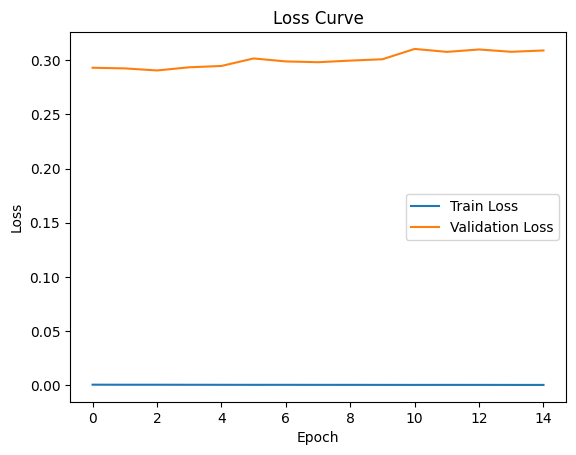

In [29]:
# Training curves
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


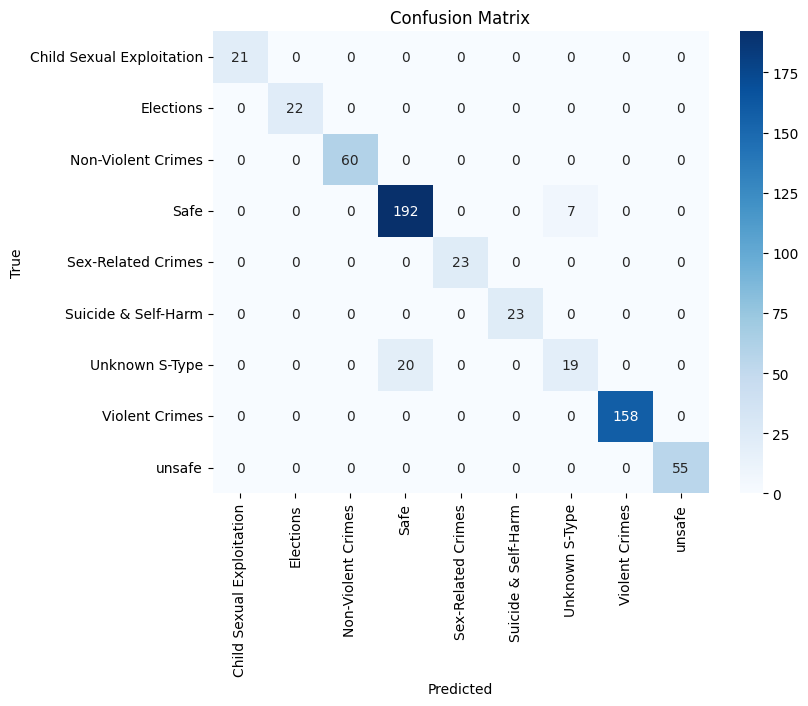

In [30]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()